In [1]:
!pip install aequitas


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.7/259.7 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.2/731.2 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.3/232.3 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Mounted at /content/drive
Train Data: (794989, 29), (794989,)
Test Data: (205011, 29), (205011,)
Undersampled Train Data: (16000, 30), (16000,)
Evaluating Logistic Regression...


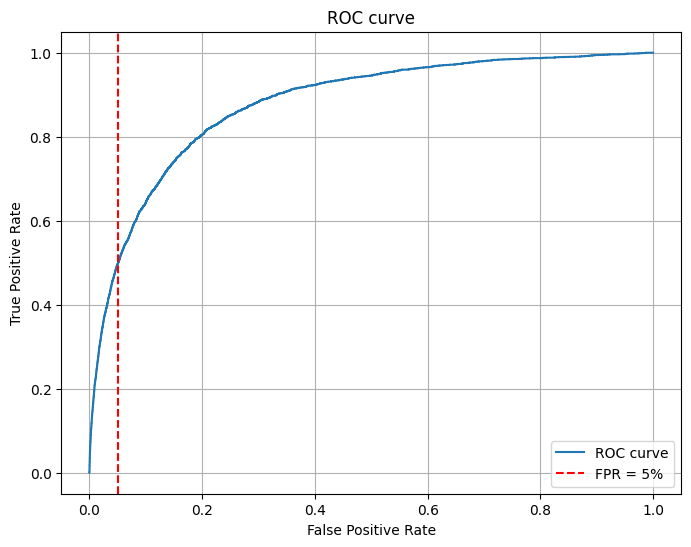

AUC: 0.8782
TPR:  49.72%
FPR:  5.00%
Threshold:  0.79
Predictive Equality:  92.00%
Evaluating Random Forest...


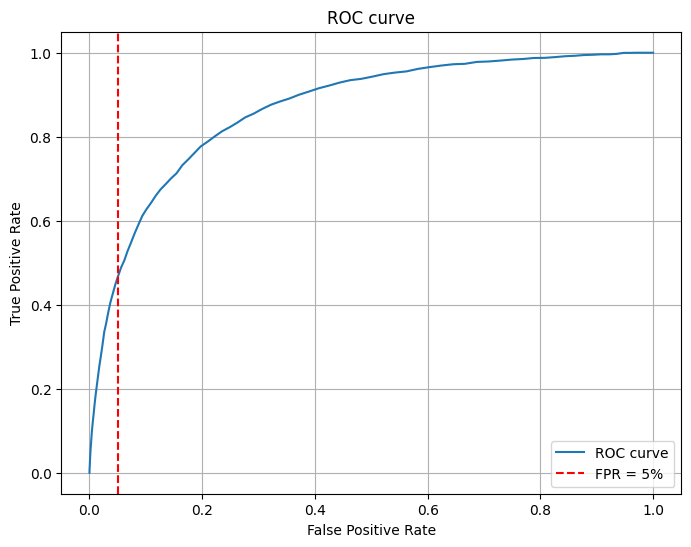

AUC: 0.8672
TPR:  44.96%
FPR:  4.62%
Threshold:  0.72
Predictive Equality:  99.10%
Evaluating Gradient Boosting...


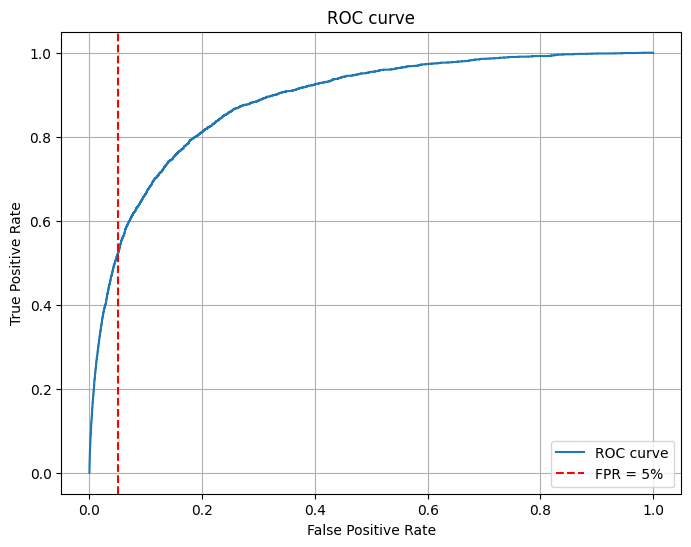

AUC: 0.8856
TPR:  52.05%
FPR:  5.00%
Threshold:  0.77
Predictive Equality:  95.82%
Evaluating Decision Tree...


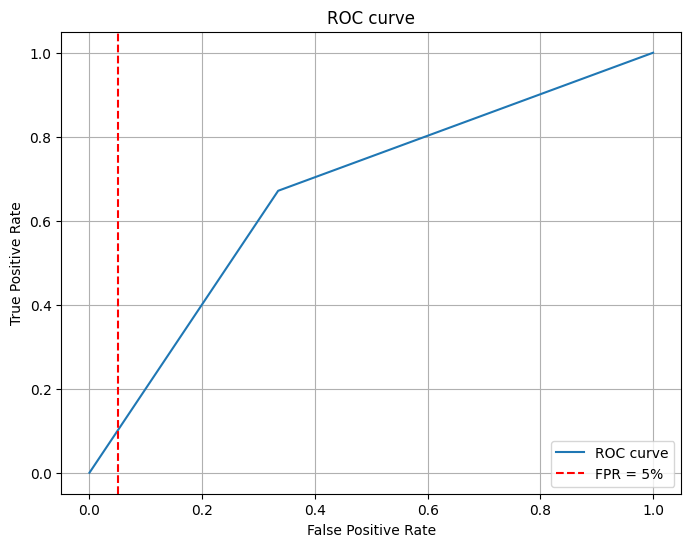

AUC: 0.6683
TPR:  0.00%
FPR:  0.00%
Threshold:  inf
Predictive Equality:  68.02%
Evaluating Naive Bayes...


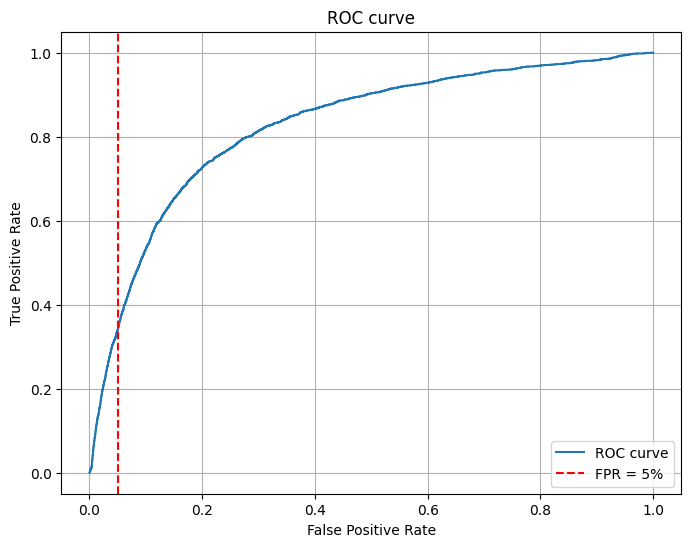

AUC: 0.8255
TPR:  33.95%
FPR:  4.98%
Threshold:  1.00
Predictive Equality:  71.45%
[LightGBM] [Info] Number of positive: 8000, number of negative: 8000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004450 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3196
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 43
Evaluating LightGBM...


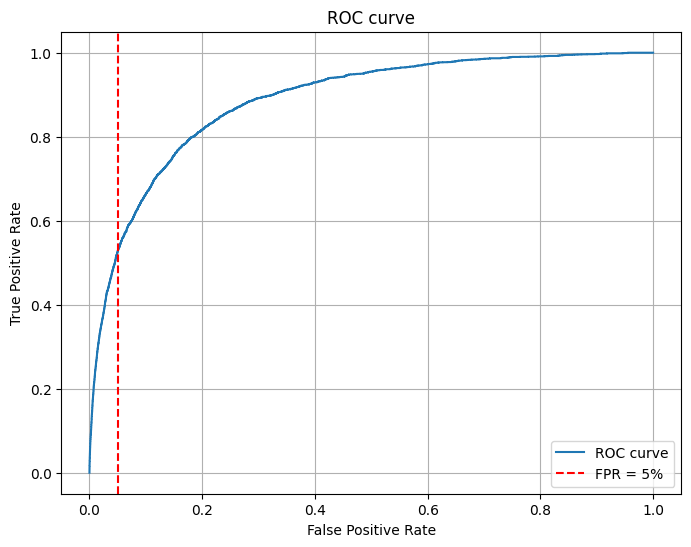

AUC: 0.8867
TPR:  52.68%
FPR:  5.00%
Threshold:  0.83
Predictive Equality:  89.43%
Evaluating XGBoost...


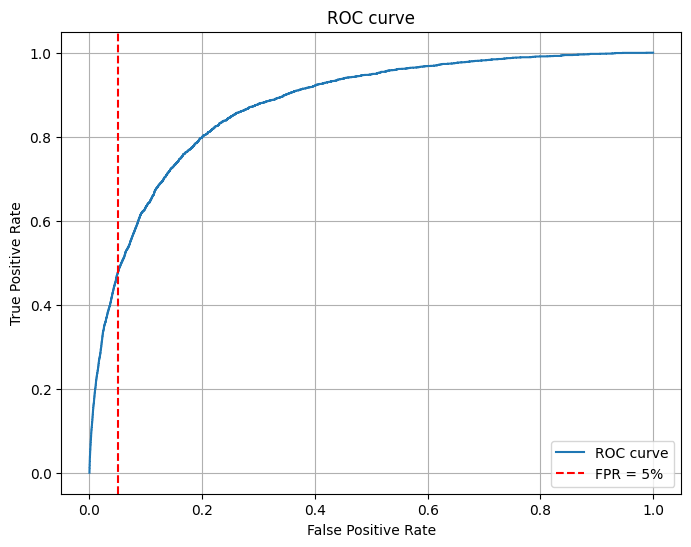

AUC: 0.8756
TPR:  47.53%
FPR:  5.00%
Threshold:  0.89
Predictive Equality:  78.03%

Model Performance Summary:
                 Model TPR at FPR=5% Fairness Predictive Equality
0  Logistic Regression        49.72%                       92.00%
1        Random Forest        44.96%                       99.10%
2    Gradient Boosting        52.05%                       95.82%
3        Decision Tree         0.00%                       68.02%
4          Naive Bayes        33.95%                       71.45%
5             LightGBM        52.68%                       89.43%
6              XGBoost        47.53%                       78.03%


In [1]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
from aequitas.group import Group
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# 공통 코드: ROC Curve 시각화
def plot_roc(fpr, tpr):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='ROC curve')
    plt.axvline(x=0.05, color='red', linestyle='--', label='FPR = 5%')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

# 공통 코드: 공정성 지표 생성
def get_fairness_metrics(y_true, y_pred, groups, FIXED_FPR):
    g = Group()
    aequitas_df = pd.DataFrame(
        {"score": y_pred,
         "label_value": y_true,
         "group": groups}
    )
    disparities_df = g.get_crosstabs(aequitas_df, score_thresholds={"score_val": [FIXED_FPR]})[0]
    predictive_equality = disparities_df["fpr"].min() / disparities_df["fpr"].max()
    return predictive_equality, disparities_df

# 공통 코드: 평가 함수
def evaluate(predictions, FIXED_FPR=0.05):
    fprs, tprs, thresholds = roc_curve(y_test, predictions)
    plot_roc(fprs, tprs)  # 공통 코드 호출

    valid_indices = np.where(fprs <= FIXED_FPR)[0]
    if len(valid_indices) > 0:
        tpr = tprs[valid_indices][-1]
        fpr = fprs[valid_indices][-1]
        threshold = thresholds[valid_indices][-1]
    else:
        tpr = 0.0
        fpr = FIXED_FPR
        threshold = None

    auc = roc_auc_score(y_test, predictions)
    predictive_equality, disparities_df = get_fairness_metrics(y_test, predictions, groups_test, FIXED_FPR)

    # 출력 형식
    to_pct = lambda x: f"{x * 100:.2f}%"
    print(f"AUC: {auc:.4f}")
    print(f"TPR:  {to_pct(tpr)}")
    print(f"FPR:  {to_pct(fpr)}")
    print(f"Threshold:  {threshold:.2f}" if threshold is not None else "Threshold: N/A")
    print(f"Predictive Equality:  {to_pct(predictive_equality)}")

    return tpr, predictive_equality

# 1. 데이터 로드 및 분리
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MODULAB/Base.csv')

# 전체가 0인 device_fraud_count 컬럼 삭제
data.drop('device_fraud_count', axis=1, inplace=True)

# month 기준으로 데이터 분리
train_data = data[data['month'] < 6]
test_data = data[data['month'] >= 6]

# 학습 데이터와 테스트 데이터 분리
X_train = train_data.drop(columns=['fraud_bool'])
y_train = train_data['fraud_bool']
X_test = test_data.drop(columns=['fraud_bool'])
y_test = test_data['fraud_bool']

X_train.drop('month', axis=1, inplace=True)
X_test.drop('month', axis=1, inplace=True)

print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Test Data: {X_test.shape}, {y_test.shape}")

# 2. 언더샘플링
fraud_sample = train_data[train_data['fraud_bool'] == 1].sample(n=8000, random_state=0)
non_fraud_sample = train_data[train_data['fraud_bool'] == 0].sample(n=8000, random_state=0)

# 언더샘플링된 학습 데이터 생성
undersampled_data = pd.concat([fraud_sample, non_fraud_sample]).sample(frac=1, random_state=0)
X_train_undersampled = undersampled_data.drop(columns=['fraud_bool'])
y_train_undersampled = undersampled_data['fraud_bool']

print(f"Undersampled Train Data: {X_train_undersampled.shape}, {y_train_undersampled.shape}")

# 3. 범주형 변수 인코딩
categorical_columns = X_train_undersampled.select_dtypes(include=['object']).columns
X_train_undersampled = pd.get_dummies(X_train_undersampled, columns=categorical_columns, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)

# 테스트 데이터와 학습 데이터의 열 맞춤
X_test = X_test.reindex(columns=X_train_undersampled.columns, fill_value=0)

# 4. 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_undersampled)
X_test_scaled = scaler.transform(X_test)

# 5. 그룹 정의
groups = (data["customer_age"] > 50).map({True: ">50", False: "<=50"})
groups_test = groups.loc[X_test.index]

# 6. 모델 리스트 정의
models = [
    ("Logistic Regression", LogisticRegression(random_state=0, max_iter=1000)),
    ("Random Forest", RandomForestClassifier(random_state=0)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=0)),
     ("Decision Tree", DecisionTreeClassifier(random_state=0)),
    ("Naive Bayes", GaussianNB()),
    ('LightGBM', LGBMClassifier(boost_from_average=False)),
    ('XGBoost', XGBClassifier())
]

# 7. 모델 평가
model_results = []
for name, model in models:
    try:
        # 학습 데이터 선택
        X_train_data = X_train_scaled if name in ["Logistic Regression", "SVM"] else X_train_undersampled
        X_test_data = X_test_scaled if name in ["Logistic Regression", "SVM"] else X_test

        # 모델 학습
        model.fit(X_train_data, y_train_undersampled)

        # 테스트 데이터 예측
        y_proba = model.predict_proba(X_test_data)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test_data)

        # 평가
        print(f"Evaluating {name}...")
        tpr, fairness = evaluate(y_proba, FIXED_FPR=0.05)

        # 결과 저장
        model_results.append((name, tpr, fairness))
    except Exception as e:
        print(f"Error with {name}: {e}")

# 8. 결과 데이터프레임 생성
results_df = pd.DataFrame(model_results, columns=["Model", "TPR at FPR=5%", "Fairness Predictive Equality"])

# 퍼센트 포맷 적용
results_df["TPR at FPR=5%"] = results_df["TPR at FPR=5%"].apply(lambda x: f"{x * 100:.2f}%")
results_df["Fairness Predictive Equality"] = results_df["Fairness Predictive Equality"].apply(lambda x: f"{x * 100:.2f}%")

# 결과 출력
print("\nModel Performance Summary:")
print(results_df)
